# Novel Corona Virus Prediction based on Symptoms

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import pickle


### Loading the dataset
df = pd.read_csv('COVID-19 Symptoms.csv')

# Exploring the dataset

In [2]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head()

,Sno,age,gender,body temperature,Dry_Cough,sour_throat,weakness,breathing_problem,drowsiness,pain in chest,...,diabetes,heart_disease,lung_disease,stroke or reduced immunity,symptoms progressed,high blood pressue,kidney_disease,change in appetide,Loss of sense of smell,Corona result
0,1,20,Male,98.6,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,0
1,2,19,Male,99.0,Yes,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,0
2,3,55,Female,102.0,Yes,Yes,Yes,Yes,Yes,Yes,...,No,No,No,No,No,No,No,Yes,No,1
3,4,40,Female,100.0,No,No,No,No,Yes,Yes,...,Yes,No,No,No,Yes,Yes,No,Yes,No,2
4,5,33,Male,99.2,No,Yes,No,Yes,No,No,...,No,No,Yes,Yes,Yes,No,No,No,Yes,2


In [3]:
# Returns number of rows and columns of the dataset
df.shape

(127, 21)

In [4]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Sno                                int64
age                                int64
gender                            object
body temperature                 float64
Dry_Cough                         object
sour_throat                       object
weakness                          object
breathing_problem                 object
drowsiness                        object
pain in chest                     object
in contact to infected people     object
diabetes                          object
heart_disease                     object
lung_disease                      object
stroke or reduced immunity        object
symptoms progressed               object
high blood pressue                object
kidney_disease                    object
change in appetide                object
Loss of sense of smell            object
Corona result                      int64
dtype: object

In [5]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sno                            127 non-null    int64  
 1   age                            127 non-null    int64  
 2   gender                         127 non-null    object 
 3   body temperature               127 non-null    float64
 4   Dry_Cough                      127 non-null    object 
 5   sour_throat                    127 non-null    object 
 6   weakness                       127 non-null    object 
 7   breathing_problem              127 non-null    object 
 8   drowsiness                     127 non-null    object 
 9   pain in chest                  127 non-null    object 
 10  in contact to infected people  127 non-null    object 
 11  diabetes                       127 non-null    object 
 12  heart_disease                  127 non-null    obj

In [6]:
# Returns a column having null values
df.isnull().sum()

Sno                              0
age                              0
gender                           0
body temperature                 0
Dry_Cough                        0
sour_throat                      0
weakness                         0
breathing_problem                0
drowsiness                       0
pain in chest                    0
in contact to infected people    0
diabetes                         0
heart_disease                    0
lung_disease                     0
stroke or reduced immunity       0
symptoms progressed              0
high blood pressue               0
kidney_disease                   0
change in appetide               0
Loss of sense of smell           0
Corona result                    0
dtype: int64

In [7]:
# Returns an object with all of the column headers 
df.columns

Index(['Sno', 'age', 'gender', 'body temperature', 'Dry_Cough', 'sour_throat',
       'weakness', 'breathing_problem', 'drowsiness', 'pain in chest',
       'in contact to infected people', 'diabetes', 'heart_disease',
       'lung_disease', 'stroke or reduced immunity', 'symptoms progressed',
       'high blood pressue', 'kidney_disease', 'change in appetide',
       'Loss of sense of smell', 'Corona result'],
      dtype='object')

In [8]:
print(df['gender'].unique())
print(df['Dry_Cough'].unique())
print(df['sour_throat'].unique())
print(df['weakness'].unique())
print(df['breathing_problem'].unique())
print(df['pain in chest'].unique())
print(df['in contact to infected people'].unique())
print(df['diabetes'].unique())
print(df['heart_disease'].unique())
print(df['lung_disease'].unique())
print(df['high blood pressue'].unique())
print(df['kidney_disease'].unique())
print(df['Loss of sense of smell'].unique())
print(df['Corona result'].unique())

['Male' 'Female']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
[0 1 2]


In [9]:
# Rearranging coloumns
df = df[['Corona result', 'age', 'gender', 'body temperature', 'Dry_Cough', 'sour_throat', 'weakness', 'breathing_problem', 'pain in chest',
         'in contact to infected people', 'diabetes', 'heart_disease', 'lung_disease', 'high blood pressue', 'kidney_disease']]

In [10]:
df.head()

,Corona result,age,gender,body temperature,Dry_Cough,sour_throat,weakness,breathing_problem,pain in chest,in contact to infected people,diabetes,heart_disease,lung_disease,high blood pressue,kidney_disease
0,0,20,Male,98.6,No,No,No,No,No,No,No,No,No,No,No
1,0,19,Male,99.0,Yes,No,No,No,No,No,No,No,No,No,No
2,1,55,Female,102.0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
3,2,40,Female,100.0,No,No,No,No,Yes,Yes,Yes,No,No,Yes,No
4,2,33,Male,99.2,No,Yes,No,Yes,No,Yes,No,No,Yes,No,No


In [11]:
df.shape

(127, 15)

# Data Cleaning

In [12]:
# Renaming pain in chest as PIC, in contact to infected people as ICTIP and high blood pressue as HBP
df = df.rename(columns={'pain in chest':'PIC', 'in contact to infected people':'ICTIP', 'high blood pressue':'HBP'})

In [13]:
df.head()

,Corona result,age,gender,body temperature,Dry_Cough,sour_throat,weakness,breathing_problem,PIC,ICTIP,diabetes,heart_disease,lung_disease,HBP,kidney_disease
0,0,20,Male,98.6,No,No,No,No,No,No,No,No,No,No,No
1,0,19,Male,99.0,Yes,No,No,No,No,No,No,No,No,No,No
2,1,55,Female,102.0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
3,2,40,Female,100.0,No,No,No,No,Yes,Yes,Yes,No,No,Yes,No
4,2,33,Male,99.2,No,Yes,No,Yes,No,Yes,No,No,Yes,No,No


In [14]:
df.describe()

,Corona result,age,body temperature
count,127.000000,127.000000,127.000000
mean,0.937008,36.456693,100.031496
std,0.675513,14.052484,1.569536
min,0.000000,18.000000,96.000000
25%,0.000000,25.500000,98.900000
50%,1.000000,33.000000,99.700000
75%,1.000000,45.000000,101.400000
max,2.000000,80.000000,103.100000


In [15]:
# Importing essential libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

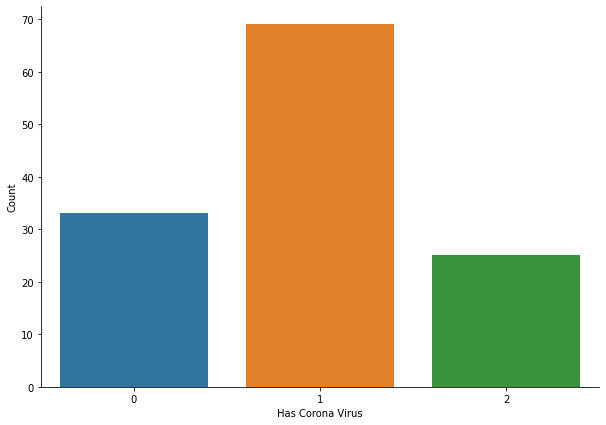

In [16]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))
sns.countplot(x='Corona result', data=df)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Has Corona Virus')
plt.ylabel('Count')

plt.show()

In [17]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
df = pd.get_dummies(df,drop_first=True)

In [18]:
df.head()

,Corona result,age,body temperature,gender_Male,Dry_Cough_Yes,sour_throat_Yes,weakness_Yes,breathing_problem_Yes,PIC_Yes,ICTIP_Yes,diabetes_Yes,heart_disease_Yes,lung_disease_Yes,HBP_Yes,kidney_disease_Yes
0,0,20,98.6,1,0,0,0,0,0,0,0,0,0,0,0
1,0,19,99.0,1,1,0,0,0,0,0,0,0,0,0,0
2,1,55,102.0,0,1,1,1,1,1,0,0,0,0,0,0
3,2,40,100.0,0,0,0,0,0,1,1,1,0,0,1,0
4,2,33,99.2,1,0,1,0,1,0,1,0,0,1,0,0


In [19]:
df.shape

(127, 15)

In [20]:
# Return correlation in between independent and dependent Features
df.corr()

,Corona result,age,body temperature,gender_Male,Dry_Cough_Yes,sour_throat_Yes,weakness_Yes,breathing_problem_Yes,PIC_Yes,ICTIP_Yes,diabetes_Yes,heart_disease_Yes,lung_disease_Yes,HBP_Yes,kidney_disease_Yes
Corona result,1.000000,0.048202,0.150100,0.052049,0.091434,0.221391,0.173149,0.412471,0.411084,0.462629,0.271150,0.070250,0.272917,0.214682,0.174279
age,0.048202,1.000000,-0.086586,-0.143779,-0.044245,-0.152654,0.110114,-0.023976,0.042568,-0.125138,0.293150,0.177934,0.272229,0.157974,0.329163
body temperature,0.150100,-0.086586,1.000000,0.043278,0.130458,0.224760,0.137889,0.109451,0.186931,0.079191,-0.101734,-0.140815,-0.180034,-0.078608,-0.129214
gender_Male,0.052049,-0.143779,0.043278,1.000000,0.135404,0.033958,-0.174262,0.063160,-0.123977,0.122510,-0.196598,0.036088,-0.022433,-0.104713,-0.137502
Dry_Cough_Yes,0.091434,-0.044245,0.130458,0.135404,1.000000,0.247883,-0.044394,0.163711,-0.030827,0.132554,0.105107,0.007633,0.009602,-0.020091,0.032420
sour_throat_Yes,0.221391,-0.152654,0.224760,0.033958,0.247883,1.000000,0.171874,0.277486,0.232619,0.046988,-0.187469,-0.087363,0.094356,-0.205232,0.075781
weakness_Yes,0.173149,0.110114,0.137889,-0.174262,-0.044394,0.171874,1.000000,0.274054,0.157729,-0.069269,-0.025831,-0.159489,0.166655,0.009232,0.095906
breathing_problem_Yes,0.412471,-0.023976,0.109451,0.063160,0.163711,0.277486,0.274054,1.000000,0.482027,0.078025,0.095254,-0.065021,0.100453,0.225998,0.029766
PIC_Yes,0.411084,0.042568,0.186931,-0.123977,-0.030827,0.232619,0.157729,0.482027,1.000000,0.103503,0.171893,-0.136091,-0.030927,0.169247,-0.013954
ICTIP_Yes,0.462629,-0.125138,0.079191,0.122510,0.132554,0.046988,-0.069269,0.078025,0.103503,1.000000,0.058749,-0.192946,0.074137,0.044685,0.004746


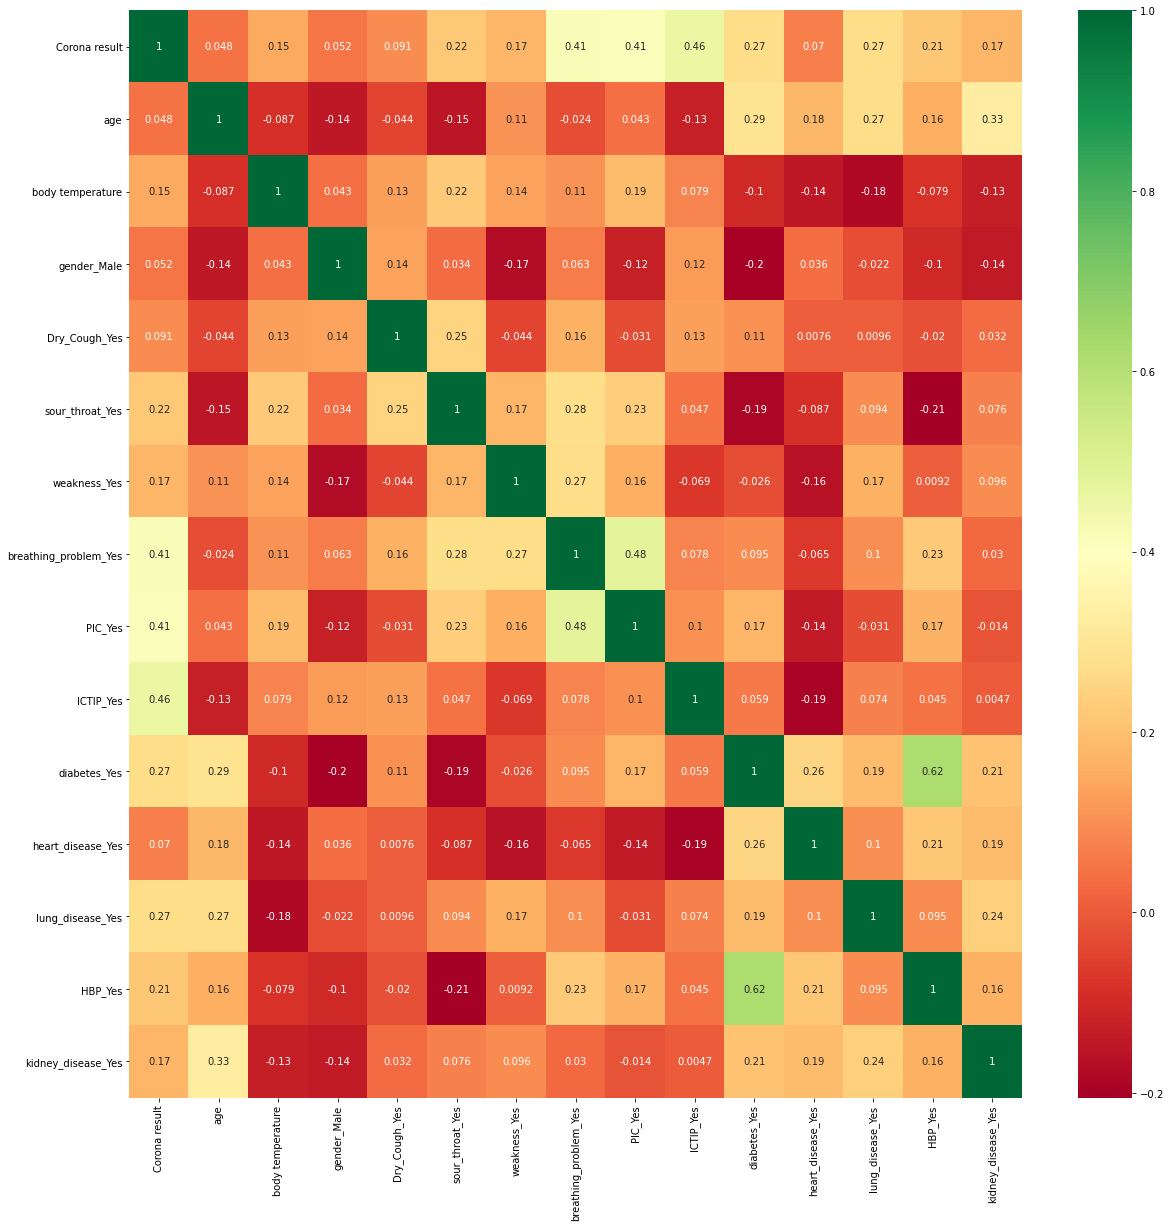

In [21]:
# Selecting correlated features using Heatmap
# Get correlation of all the features of the dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
df.head()

,Corona result,age,body temperature,gender_Male,Dry_Cough_Yes,sour_throat_Yes,weakness_Yes,breathing_problem_Yes,PIC_Yes,ICTIP_Yes,diabetes_Yes,heart_disease_Yes,lung_disease_Yes,HBP_Yes,kidney_disease_Yes
0,0,20,98.6,1,0,0,0,0,0,0,0,0,0,0,0
1,0,19,99.0,1,1,0,0,0,0,0,0,0,0,0,0
2,1,55,102.0,0,1,1,1,1,1,0,0,0,0,0,0
3,2,40,100.0,0,0,0,0,0,1,1,1,0,0,1,0
4,2,33,99.2,1,0,1,0,1,0,1,0,0,1,0,0


In [23]:
# Independent and Dependent Features
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [24]:
X.head()

,age,body temperature,gender_Male,Dry_Cough_Yes,sour_throat_Yes,weakness_Yes,breathing_problem_Yes,PIC_Yes,ICTIP_Yes,diabetes_Yes,heart_disease_Yes,lung_disease_Yes,HBP_Yes,kidney_disease_Yes
0,20,98.6,1,0,0,0,0,0,0,0,0,0,0,0
1,19,99.0,1,1,0,0,0,0,0,0,0,0,0,0
2,55,102.0,0,1,1,1,1,1,0,0,0,0,0,0
3,40,100.0,0,0,0,0,0,1,1,1,0,0,1,0
4,33,99.2,1,0,1,0,1,0,1,0,0,1,0,0


In [25]:
X.shape

(127, 14)

In [26]:
y.head()

0    0
1    0
2    1
3    2
4    2
Name: Corona result, dtype: int64

In [27]:
# features importances

from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [28]:
print(model.feature_importances_)

[0.08997062 0.06219946 0.06683155 0.04375067 0.04454104 0.03687656
 0.07952153 0.13911528 0.21975892 0.09238516 0.05657313 0.04127672
 0.02038667 0.0068127 ]


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (114, 14), X_test size: (13, 14)


In [30]:
X_train.shape

(114, 14)

# Model Building

# 1. Logistic Regression Model

In [31]:
# --- Model Building ---
# LogisticRegression Model

from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
accuracy = lreg.score(X_train,y_train)
print(f'Accuracy:{round(accuracy*100,3)}%')

Accuracy:72.807%


# 2. Decision Tree Classifier Model

In [33]:
# --- Model Building ---
# Decision Tree Classifier Model

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [34]:
accuracy = clf.score(X_train,y_train)
print(f'Accuracy:{round(accuracy*100,3)}%')

Accuracy:78.07%


# 3. RandomForest Classifier Model

In [35]:
# --- Model Building ---
# RandomForest Classifier Model

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [36]:
accuracy = classifier.score(X_train,y_train)
print(f'Accuracy:{round(accuracy*100,3)}%')

Accuracy:97.368%


# Model Evaluation

In [37]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[4, 1, 0],
       [0, 6, 0],
       [0, 2, 0]], dtype=int64)

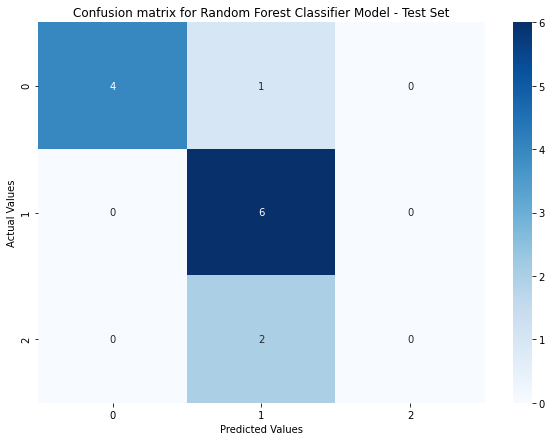

In [38]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [39]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 76.92%


In [40]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.67      1.00      0.80         6
           2       0.00      0.00      0.00         2

    accuracy                           0.77        13
   macro avg       0.56      0.60      0.56        13
weighted avg       0.69      0.77      0.71        13



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# Creating a confusion matrix for training set
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[27,  1,  0],
       [ 1, 62,  0],
       [ 0,  1, 22]], dtype=int64)

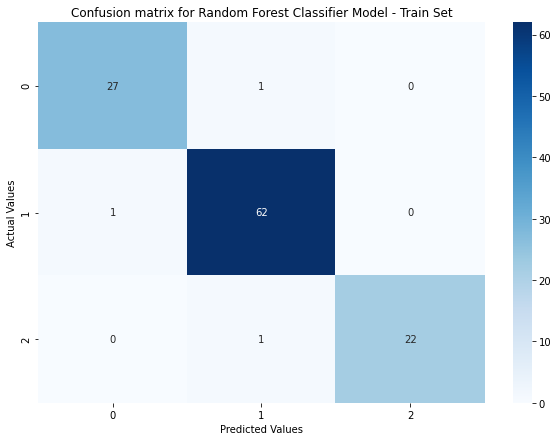

In [42]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [43]:
# Accuracy Score
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 97.37%


In [44]:
# Classification Report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.97      0.98      0.98        63
           2       1.00      0.96      0.98        23

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Predictions:

In [45]:
# RandomForest Classifier Model
def predict(age, body_temperature, Gender_Male, Dry_Cough_Yes, sour_throat_Yes, weakness_Yes, breathing_problem_Yes, PIC_Yes, 
            ICTIP_Yes, diabetes_Yes, heart_disease_Yes, lung_disease_Yes, kidney_disease_Yes, HBP_Yes):

       
        if(Gender_Male == 'Male'):
             Gender_Male = 1
        else:
             Gender_Male = 0

        if(Dry_Cough_Yes == 'Yes'):
             Dry_Cough_Yes = 1
        else:
             Dry_Cough_Yes = 0

        if(sour_throat_Yes == 'Yes'):
             sour_throat_Yes = 1
        else:
             sour_throat_Yes = 0

        if(weakness_Yes == 'Yes'):
             weakness_Yes = 1
        else:
             weakness_Yes = 0

        if(breathing_problem_Yes == 'Yes'):
             breathing_problem_Yes = 1
        else:
             breathing_problem_Yes = 0

        if(PIC_Yes == 'Yes'):
             PIC_Yes = 1
        else:
             PIC_Yes = 0

        if(ICTIP_Yes == 'Yes'):
             ICTIP_Yes = 1
        else:
             ICTIP_Yes = 0

        if(diabetes_Yes == 'Yes'):
             diabetes_Yes = 1
        else:
             diabetes_Yes = 0

        if(heart_disease_Yes == 'Yes'):
             heart_disease_Yes = 1
        else:
             heart_disease_Yes = 0

        if(lung_disease_Yes == 'Yes'):
             lung_disease_Yes = 1
        else:
             lung_disease_Yes = 0

        if(kidney_disease_Yes == 'Yes'):
             kidney_disease_Yes = 1
        else:
             kidney_disease_Yes = 0

        if(HBP_Yes == 'Yes'):
             HBP_Yes = 1
        else:
             HBP_Yes = 0

        data = np.array([[age, body_temperature, Gender_Male, Dry_Cough_Yes, sour_throat_Yes, weakness_Yes, breathing_problem_Yes, PIC_Yes, ICTIP_Yes, diabetes_Yes, heart_disease_Yes,
                          lung_disease_Yes, kidney_disease_Yes, HBP_Yes]])
        return (classifier.predict(data)[0])
       

# Prediction 1

In [46]:
my_prediction = predict(age=45, body_temperature=99.1, Gender_Male='Male', Dry_Cough_Yes='No', sour_throat_Yes='No', weakness_Yes='No',
                breathing_problem_Yes='No', PIC_Yes='No', ICTIP_Yes='No', diabetes_Yes='No', heart_disease_Yes='No', lung_disease_Yes='No',
                kidney_disease_Yes='No', HBP_Yes='Yes')
print("MY PREDICTION:")
if(my_prediction == 0):
    
         print("Don't worry..! You are Safe.")

elif(my_prediction == 1):
    
         print("Oops..! You have Symptoms of the Corona Virus.")

elif(my_prediction == 2): 
    
         print("Oops..!! You are Infected with the Corona Virus.")

MY PREDICTION:
Don't worry..! You are Safe.


# Prediction 2

In [47]:
my_prediction = predict(age=45, body_temperature=99.1, Gender_Male='Male', Dry_Cough_Yes='Yes', sour_throat_Yes='Yes', weakness_Yes='No',
                breathing_problem_Yes='No', PIC_Yes='Yes', ICTIP_Yes='Yes', diabetes_Yes='No', heart_disease_Yes='No', lung_disease_Yes='No',
                kidney_disease_Yes='No', HBP_Yes='Yes')
print("MY PREDICTION:")
if(my_prediction == 0):
    
         print("Don't worry..! You are Safe.")

elif(my_prediction == 1):
    
         print("Oops..! You have Symptoms of the Corona Virus.")

elif(my_prediction == 2): 
    
         print("Oops..!! You are Infected with the Corona Virus.")

MY PREDICTION:
Oops..! You have Symptoms of the Corona Virus.


# Prediction 3

In [48]:
my_prediction = predict(age=45, body_temperature=104, Gender_Male='Male', Dry_Cough_Yes='Yes', sour_throat_Yes='Yes', weakness_Yes='Yes',
                breathing_problem_Yes='Yes', PIC_Yes='Yes', ICTIP_Yes='No', diabetes_Yes='No', heart_disease_Yes='No', lung_disease_Yes='No',
                kidney_disease_Yes='No', HBP_Yes='Yes')
print("MY PREDICTION:")
if(my_prediction == 0):
    
         print("Don't worry..! You are Safe.")

elif(my_prediction == 1):
    
         print("Oops..! You have Symptoms of the Corona Virus.")

elif(my_prediction == 2): 
    
         print("Oops..!! You are Infected with the Corona Virus.")

MY PREDICTION:
Oops..!! You are Infected with the Corona Virus.
